# **Walmart Sales**

Tabel tersebut berisi data untuk 45 toko Walmart. Penjualan mingguan, suhu udara, dan harga bahan bakar di wilayah tempat toko tertentu berada. Serta informasi indeks harga konsumen dan tingkat pengangguran.

Kami akan mempelajari data penjualan salah satu pengecer terbesar di dunia. Mari kita cari tahu faktor apa saja yang mempengaruhi pendapatannya. Dapatkah faktor-faktor seperti suhu udara dan biaya bahan bakar mempengaruhi keberhasilan sebuah perusahaan besar bersama dengan indeks daya beli dan diskon musiman? Dan bagaimana pembelajaran mesin meminimalkan biaya dan meningkatkan dampak ekonomi?

**Data berisi kolom berikut:**

1. Store: Nomor toko
2. Date: Tanggal mulai minggu penjualan
3. Weekly_sales: Penjualan
4. Holiday_Flag: Menandai ada tidaknya hari libur ( 1 untuk hari libur, 0 untuk bukan hari libur )
5. Temperature: Suhu udara di wilayah tersebut (Farenheit)
6. Fuel_Price: Biaya bahan bakar di wilayah tersebut
7. CPI: Indeks harga konsumen
8. Pengangguran: Tingkat pengangguran

In [260]:
#import libary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [261]:
# checking missing value
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [262]:
#checking variable
df.shape

(6435, 8)

In [263]:
#checking data types
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [264]:
# kita ubah colom date dari object ke datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [265]:
#checking outlier
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [266]:
#ubah satuan suhu temperature dari farenhait ke celcius
def fahrenheit_to_celsius(fahrenheit):
    celsius = (fahrenheit - 32) * 5.0/9.0
    return celsius

df['Temperature'] = df['Temperature'].apply(fahrenheit_to_celsius).round(1)

In [267]:
df['tanggal'] = pd.to_datetime(df['Date']).dt.strftime('%m %Y')


In [268]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,tanggal
0,1,2010-02-05,1643690.90,0,5.7,2.572,211.096358,8.106,02 2010
1,1,2010-02-12,1641957.44,1,3.6,2.548,211.242170,8.106,02 2010
2,1,2010-02-19,1611968.17,0,4.4,2.514,211.289143,8.106,02 2010
3,1,2010-02-26,1409727.59,0,8.1,2.561,211.319643,8.106,02 2010
4,1,2010-03-05,1554806.68,0,8.1,2.625,211.350143,8.106,03 2010


# **Insight**

Tujuan
1. faktor apa saja yang mempengaruhi pendapatannya?
2.  Dapatkah faktor-faktor seperti suhu udara dan biaya bahan bakar mempengaruhi keberhasilan sebuah perusahaan besar bersama dengan indeks daya beli dan diskon musiman?
3. bagaimana pembelajaran mesin meminimalkan biaya dan meningkatkan dampak ekonomi?

Kita cari nilai-nilai individu dari rata-rata weekly_sales setiap store. Data dengan standar deviasi tinggi cenderung memiliki tingkat ketidakpastian yang lebih besar dibandingkan dengan data yang memiliki standar deviasi rendah.

Store                Store 14
Weekly_Sales    317569.949476
Name: 13, dtype: object


<ipython-input-269-b23a7a4b6321>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=std_dev_per_store['Store'], y=std_dev_per_store['Weekly_Sales'], palette='viridis')


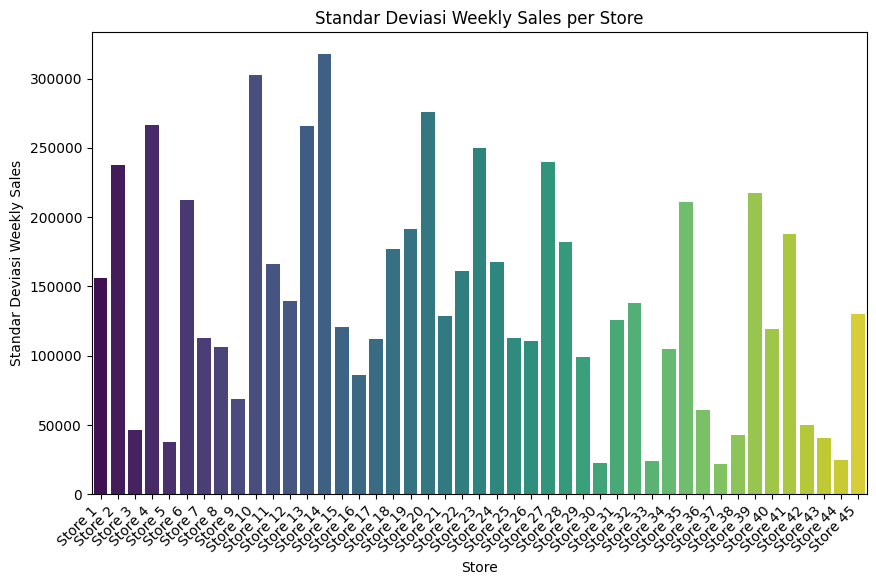

In [269]:
std_dev_per_store = df.groupby('Store')['Weekly_Sales'].std().reset_index()
store_ids = [f"Store {i}" for i in range(1, 46)]
std_dev_per_store['Store']=store_ids
# Menampilkan standar deviasi setiap toko
store_with_highest_std_dev = std_dev_per_store.loc[std_dev_per_store['Weekly_Sales'].idxmax()]
print(store_with_highest_std_dev)

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(x=std_dev_per_store['Store'], y=std_dev_per_store['Weekly_Sales'], palette='viridis')
plt.title('Standar Deviasi Weekly Sales per Store')
plt.xlabel('Store')
plt.xticks(rotation=45, ha='right')  # Memberikan rotasi pada label store untuk memudahkan pembacaan
plt.ylabel('Standar Deviasi Weekly Sales')
plt.show()

Store 14 menunjukan nilai standar deviasi tertinggi yang menggambarkan ketidakstabilan penghasilan yang didapatkannya. Store dengan kesetabilan yang baik diperoleh store 30.

In [270]:
# Menghitung total pendapatan setiap toko
total_sales_per_store = df.groupby('Store')['Weekly_Sales'].sum()

sorted_total_sales = total_sales_per_store.sort_values(ascending=False)
# Menampilkan hasil
print(sorted_total_sales)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64


dibalik ketidak setabilannya store 14 mendapatkan pendaptan yang lebih banyak dibandingkan store 30.

In [271]:
# Mengelompokkan banyaknya hari libur dan tidak hari libur pada toko 1
grouped_data = df[df['Store'] == 30].groupby('Holiday_Flag').size().reset_index(name='Count')

# Menampilkan hasil
print(grouped_data)


   Holiday_Flag  Count
0             0    133
1             1     10


<ipython-input-272-f7b24f1aa31b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Holiday_Flag', data=df, palette='viridis')


<Axes: xlabel='Holiday_Flag', ylabel='count'>

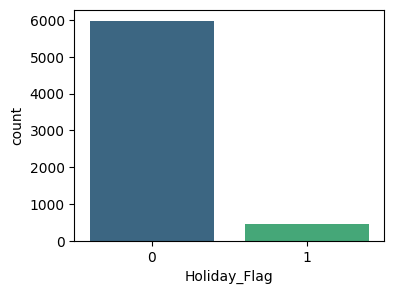

In [272]:
# Membuat countplot
plt.figure(figsize=(4, 3))
sns.countplot(x='Holiday_Flag', data=df, palette='viridis')

Setiap Store memiliki periode yang sama, pada periode ini hari yang bukan libur jauh lebih banyak terjadi.

Kemudian apakah hari libur membuat hasil pedagannya meningkat?

In [273]:
# Menghitung weekly_sales tertinggi dan terendah dari masing-masing holiday_flag
result = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['max', 'min']).reset_index()

# Menampilkan hasil
print(result)


   Holiday_Flag         max        min
0             0  3818686.45  209986.25
1             1  3004702.33  215359.21


Dari pendapatan tertinggi dan terendah perbedaan pendapatan tidak terlihat berpengaruh ya? tapi ada kemungkinan yang lain misalnya rata-rata pendapatan hari libur jauh lebih besar dibandingkan tidak libur.

Pada bulan apa? Pendapatan rata-rata store mendapatkan tertinggi?

In [274]:
# Menghitung weekly_sales tertinggi dan terendah dari masing-masing holiday_flag
result_mean = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# Menampilkan hasil
print(result_mean)

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


Ternyata rata-ratanya juga tidak menunjukan perbedaan pendapatan dikeduanya.

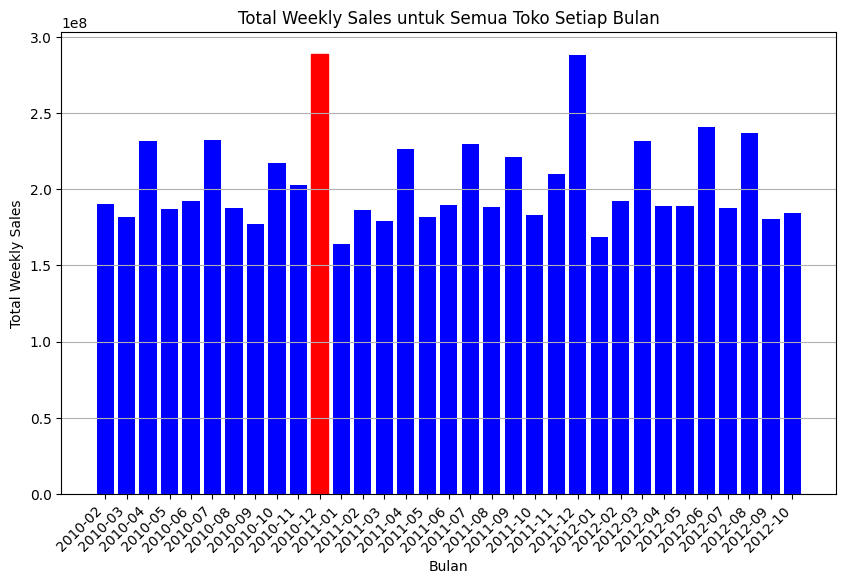

In [275]:
df['Month'] = df['Date'].dt.to_period('M')
# Menghitung jumlah weekly_sales dari setiap bulan untuk semua toko
monthly_sales_all_stores = df.groupby(['Month'])['Weekly_Sales'].sum().reset_index()

# Mencari indeks bar dengan nilai tertinggi
max_index = monthly_sales_all_stores['Weekly_Sales'].idxmax()

# Membuat barplot dengan warna berbeda untuk bar tertinggi
plt.figure(figsize=(10, 6))
bars = plt.bar(monthly_sales_all_stores['Month'].astype(str), monthly_sales_all_stores['Weekly_Sales'], color='blue')

# Menentukan warna khusus untuk bar tertinggi
bars[max_index].set_color('red')

plt.title('Total Weekly Sales untuk Semua Toko Setiap Bulan')
plt.xlabel('Bulan')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Weekly Sales')
plt.grid(axis='y')
plt.show()


Pada bulan ke 12 pendapatan toko melunjak naik secara signifikan. Seperti yang kita tahu pada bulan itu terjadi hari libur Natal dan Tahun Baru. Lalu apa yang terjadi pada store 14 dan store 30?

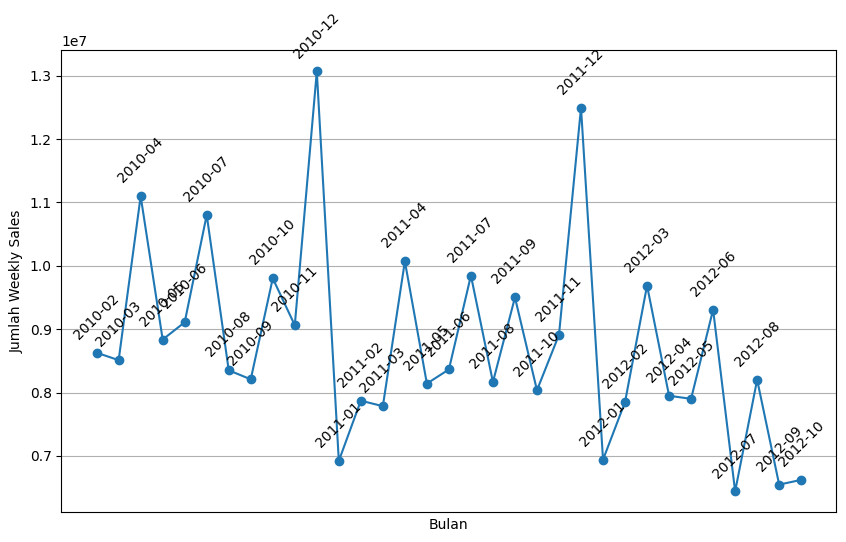

In [276]:
# Memfilter hanya data untuk "Store 14"
store_14_data = df[df['Store'] == 14]

# Menghitung jumlah weekly_sales dari setiap bulan untuk "Store 1"
monthly_sales_store_14 = store_14_data.groupby(['Month', 'Store'])['Weekly_Sales'].sum().reset_index()

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_store_14['Month'].astype(str), monthly_sales_store_14['Weekly_Sales'], marker='o')
for i, txt in enumerate(monthly_sales_store_14['Month'].astype(str)):
    plt.annotate(txt, (monthly_sales_store_14['Month'].astype(str)[i], monthly_sales_store_14['Weekly_Sales'][i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', rotation=45)

plt.xlabel('Bulan')
plt.xticks([])
plt.ylabel('Jumlah Weekly Sales')
plt.grid(True)
plt.show()

Bulan Desember melonjak naik sangat signifikan

In [278]:
F=df['Fuel_Price'].nunique()
T=df['Temperature'].nunique()
C=df['CPI'].nunique()

print(F)
print(T)
print(C)

892
478
2145


       Weekly_Sales  Temperature          CPI
count  6.435000e+03  6435.000000  6435.000000
mean   1.046965e+06    15.924040   171.578394
std    5.643666e+05    10.247585    39.356712
min    2.099862e+05   -18.900000   126.064000
25%    5.533501e+05     8.600000   131.735000
50%    9.607460e+05    17.000000   182.616521
75%    1.420159e+06    23.900000   212.743293
max    3.818686e+06    37.900000   227.232807


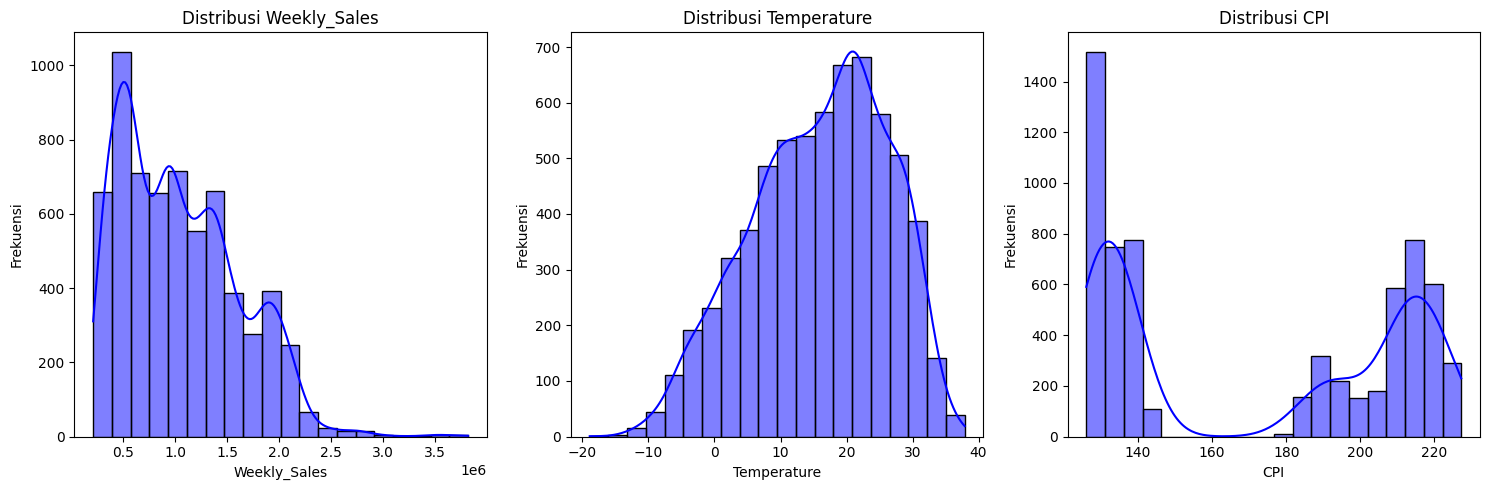

In [279]:
# Menambahkan kolom "Month" untuk grouping
df['Month'] = df['Date'].dt.to_period('M')

# Mencetak statistik deskriptif dari fitur-fitur numerik
numeric_features = ['Weekly_Sales', 'Temperature', 'CPI']
print(df[numeric_features].describe())

# Menampilkan distribusi numerik menggunakan histogram
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


        Fuel_Price  Unemployment
count  6435.000000   6435.000000
mean      3.358607      7.999151
std       0.459020      1.875885
min       2.472000      3.879000
25%       2.933000      6.891000
50%       3.445000      7.874000
75%       3.735000      8.622000
max       4.468000     14.313000


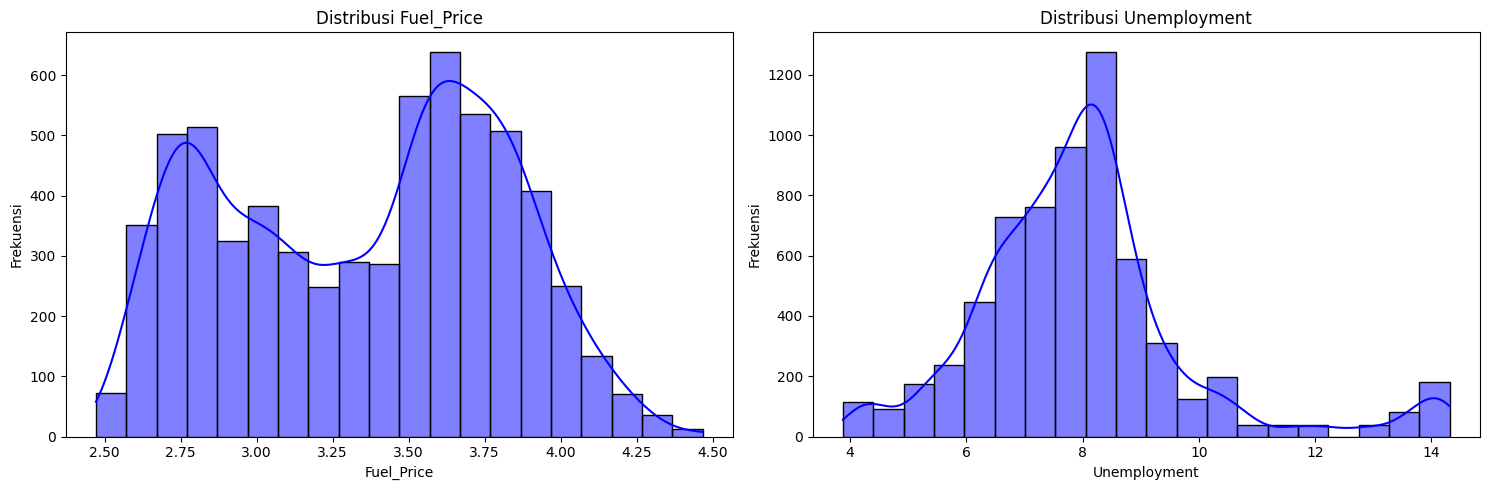

In [280]:
# Menambahkan kolom "Month" untuk grouping
df['Month'] = df['Date'].dt.to_period('M')

# Mencetak statistik deskriptif dari fitur-fitur numerik
numeric_features = ['Fuel_Price', 'Unemployment']
print(df[numeric_features].describe())

# Menampilkan distribusi numerik menggunakan histogram
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


<ipython-input-281-b4748ead2539>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


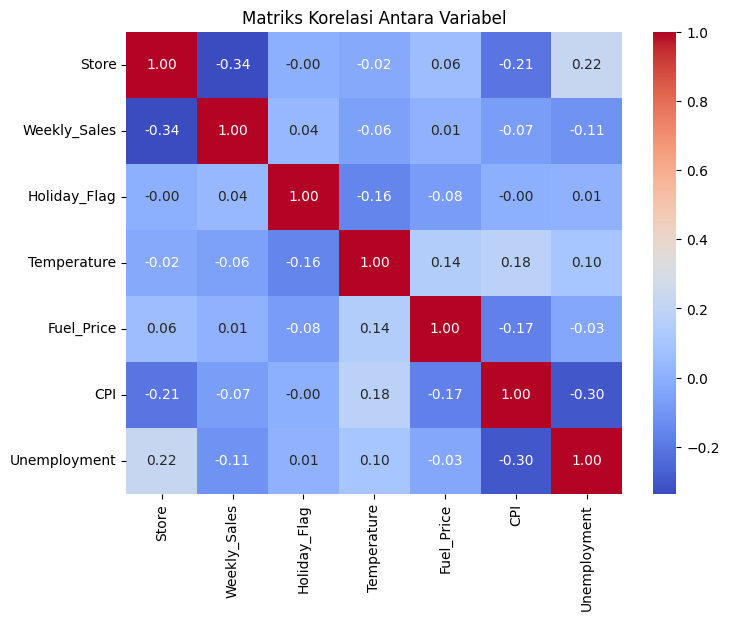

In [281]:
# Membuat matriks korelasi
corr_matrix = df.corr()

# Plotting heatmap untuk matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriks Korelasi Antara Variabel')
plt.show()

Tidak terdapat hubungan yang secara signifikan yang mempengaruhi pendapatan weekly_sales.

# **Model**

In [282]:
df['Month'] = df['Date'].dt.month
df['Hari'] = df['Date'].dt.day
df['Tahun'] = df['Date'].dt.year

In [283]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,tanggal,Month,Hari,Tahun
0,1,2010-02-05,1643690.90,0,5.7,2.572,211.096358,8.106,02 2010,2,5,2010
1,1,2010-02-12,1641957.44,1,3.6,2.548,211.242170,8.106,02 2010,2,12,2010
2,1,2010-02-19,1611968.17,0,4.4,2.514,211.289143,8.106,02 2010,2,19,2010
3,1,2010-02-26,1409727.59,0,8.1,2.561,211.319643,8.106,02 2010,2,26,2010
4,1,2010-03-05,1554806.68,0,8.1,2.625,211.350143,8.106,03 2010,3,5,2010


In [284]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
tanggal                 object
Month                    int64
Hari                     int64
Tahun                    int64
dtype: object

In [285]:
# Dropping Per_Sqft column
df.drop(['Date','tanggal'],axis=1,inplace=True)

**LinearRegression**

In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Weekly_Sales',axis=1), df['Weekly_Sales'], test_size=0.2, random_state=42)

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan metrik evaluasi
print("\nMetrik Evaluasi:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Metrik Evaluasi:
Mean Squared Error (MSE): 272067129361.2093
R-squared (R2): 0.1554764103046926


**DecissionTreeRegressor**

In [288]:
from sklearn.tree import DecisionTreeRegressor

# Membuat dan melatih model Decision Tree Regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Membuat prediksi menggunakan data uji
dtr_pred = dtr.predict(X_test)

# Evaluasi model
dtr_mse = mean_squared_error(y_test, dtr_pred)
dtr_r2 = r2_score(y_test, dtr_pred)

# Menampilkan metrik evaluasi
print("Metrik Evaluasi:")
print("Mean Squared Error (MSE):", dtr_mse)
print("R-squared (R2):", dtr_r2)

Metrik Evaluasi:
Mean Squared Error (MSE): 20419993728.654137
R-squared (R2): 0.9366142964577571


In [289]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': dtr_pred})
dft.reset_index(drop=True, inplace=True)

<ipython-input-290-a63d3d354c4e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
<ipython-input-290-a63d3d354c4e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Predicted'], color = 'g', label = 'Pre

<Axes: xlabel='Predicted', ylabel='Density'>

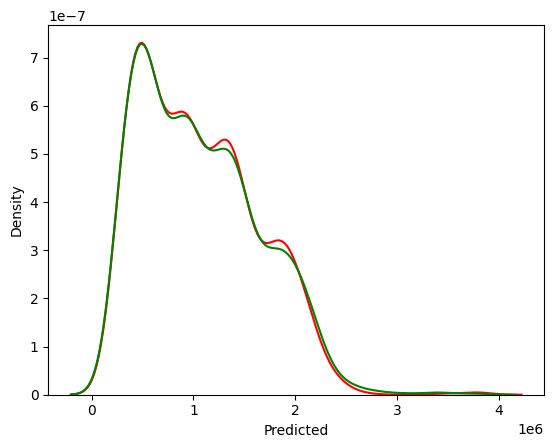

In [290]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax, hist = False)

# **Kesimpulan**

Walmart Sales data diambil dari kaggle. Dataset yang ada sebanyak (6435, 8) kolom weekly_sales sebagai data target.
1. Dataset sudah rapih, hanya dtypes kolom Date yang perlu diubah.
2. Menjawab Tujuan:
    1. Faktor yang mempengaruhi pendapatan yakni tanggal libur untuk Natal dan Tahun Baru. Untuk bulan Desember pendapatan store akan meningkat dari bulan sebelumnya
    2. Tidak tampak begitu pengaruh temperature, Fuel_Price, CPI, dan unployment. Hal ini dapat dilihat pada tabel corr().
    3. Model yang baik untuk dataset ini yakni decissiontree regresion yang mendapatkan r2 score 93%. serta displot data actual dan predict model DTR menggambarkan garis yang alur yang hampir sama.